# US Supreme Court Demographics Part 2: EDA

*Over time, we've been seeing Supreme Court Justices being nominated at a young age and serving for multiple decades at an old age.*

*Within the current court (Roberts), two Justices have served for a relatively long time; Justice Clarence Thomas (30 years come October) and Justice Stephen Bryer (27 years).*

*Respecting Article 3 and Federalist 78 original intent, this analysis in no way is aiming a finger to a particular Justice for their length of time on the court.*

### Column Descriptions

0. **name** - Justice's full name
1. **birth_date** - Justice's date of birth
2. **birth_year** - Justice's year of birth
3. **birth_month** - Justice's month of birth
4. **birth_day** - Justice's day of birth
5. **birth_st** - State in which Justice was born
6. **gender** - Justice's gender
7. **race** - Justice's race
8. **religion** - Justice's religion
9. **state** - State in which Justice lives
10. **party** - Political party of the President who nominated Justice
11. **president** - President who nominated Justice
12. **sentae_aye** - Senate votes for the nomination of Justice
13. **sentae_nay** - Senate votes against the nomination of Justice
14. **term_start** - Date when Justice started on the court
15. **term_start_year** - Year when Justice started on the court
16. **term_start_month** - Month when Justice started on the court
17. **term_start_day** - Day when Justice started on the court
18. **term_end** - Date when Justice ended on the court
19. **term_end_year** - Year when Justice ended on the court
20. **term_end_month** - Month when Justice ended on the court
21. **term_end_day** - Day when Justice ended on the court
22. **death_date** - Justice's death date
23. **death_year** - Justice's death year
24. **death_month** - Justice's death month
25. **death_day** - Justice's death day

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta

In [2]:
scotus = pd.read_csv("supreme_data_revised.csv")

In [3]:
scotus.sample(3)

,name,birth_date,birth_year,birth_month,birth_day,birth_st,gender,race,religion,state,...,term_start_month,term_start_day,term_end,term_end_year,term_end_month,term_end_day,death_date,death_year,death_month,death_day
44,John Harlan (I),1833-06-01,1833,June,1,Kentucky,Male,White,Presbyterian,Kentucky,...,December,10,1911-10-14,1911.0,October,14.0,1911-10-14,1911.0,10.0,14.0
62,Charles Hughes,1862-04-11,1862,April,11,New York,Male,White,Baptist,New York,...,October,10,1916-06-10,1916.0,June,10.0,1948-08-27,1948.0,8.0,27.0
46,Stanley Matthews,1824-07-21,1824,July,21,Ohio,Male,White,Presbyterian,Ohio,...,May,17,1889-03-22,1889.0,March,22.0,1889-03-22,1889.0,3.0,22.0


In [4]:
scotus = scotus.set_index("name")

In [5]:
scotus.sample(3)

,birth_date,birth_year,birth_month,birth_day,birth_st,gender,race,religion,state,party,...,term_start_month,term_start_day,term_end,term_end_year,term_end_month,term_end_day,death_date,death_year,death_month,death_day
name,,,,,,,,,,,,,,,,,,,,,
Harlan Stone,1872-10-11,1872,October,11,New Hampshire,Male,White,Episcopalian,New York,Republican,...,March,2,1946-04-22,1946.0,April,22.0,1946-04-22,1946.0,4.0,22.0
Stanley Matthews,1824-07-21,1824,July,21,Ohio,Male,White,Presbyterian,Ohio,Republican,...,May,17,1889-03-22,1889.0,March,22.0,1889-03-22,1889.0,3.0,22.0
John McKinley,1780-05-01,1780,May,1,Virginia,Male,White,Protestant,Alabama,Democrat,...,September,25,1852-07-19,1852.0,July,19.0,1852-07-19,1852.0,7.0,19.0


**Task 1: Explore the data**

In [6]:
scotus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, John Jay to Amy Barrett
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   birth_date        117 non-null    object 
 1   birth_year        117 non-null    int64  
 2   birth_month       117 non-null    object 
 3   birth_day         117 non-null    int64  
 4   birth_st          111 non-null    object 
 5   gender            117 non-null    object 
 6   race              117 non-null    object 
 7   religion          117 non-null    object 
 8   state             117 non-null    object 
 9   party             117 non-null    object 
 10  president         117 non-null    object 
 11  senate_aye        49 non-null     float64
 12  senate_nay        49 non-null     float64
 13  term_start        117 non-null    object 
 14  term_start_year   117 non-null    int64  
 15  term_start_month  117 non-null    object 
 16  term_start_day    117 non-null    

In [7]:
scotus.describe().T

,count,mean,std,min,25%,50%,75%,max
birth_year,117.0,1844.487179,64.608318,1732.0,1790.00,1844.0,1894.00,1972.0
birth_day,117.0,15.051282,8.215677,1.0,8.00,16.0,22.00,31.0
senate_aye,49.0,58.102041,22.750682,21.0,41.00,54.0,71.00,99.0
senate_nay,49.0,14.653061,14.312802,0.0,4.00,9.0,23.00,48.0
term_start_year,117.0,1897.752137,65.893711,1789.0,1845.00,1902.0,1949.00,2020.0
term_start_day,117.0,12.777778,8.410903,1.0,5.00,11.0,19.00,31.0
term_end_year,108.0,1905.268519,62.173650,1791.0,1860.75,1910.0,1953.25,2020.0
term_end_day,108.0,16.925926,9.272312,1.0,9.00,17.0,25.00,31.0
death_year,105.0,1907.047619,61.249707,1798.0,1861.00,1910.0,1953.00,2020.0
death_month,105.0,6.590476,3.081256,1.0,4.00,7.0,9.00,12.0


In [8]:
print("Number of Rows:", scotus.shape[0])
print("Number of Columns:", scotus.shape[1])

Number of Rows: 117
Number of Columns: 25


In [9]:
scotus.nunique()

birth_date          115
birth_year           92
birth_month          12
birth_day            30
birth_st             27
gender                2
race                  3
religion             14
state                31
party                 6
president            40
senate_aye           40
senate_nay           22
term_start          114
term_start_year      91
term_start_month     12
term_start_day       29
term_end            108
term_end_year        90
term_end_month       12
term_end_day         30
death_date          102
death_year           85
death_month          12
death_day            29
dtype: int64

**Task 2: Find the amount of years related to their time on Earth, start and end of their tenure on the court.** 

***2.1: Create a function that follows the above task***

In [10]:
def year_amount(column_one, column_two):
    '''Calculate the amount of years between two dates'''
    
    new_column_one = pd.to_datetime(column_one)
    new_column_two = pd.to_datetime(column_two)
    
    difference = new_column_two - new_column_one
    
    years = difference / np.timedelta64(1,'Y')
    return np.floor(years)

***2.2: Test the function***

In [11]:
year_amount(scotus["birth_date"], scotus["death_date"])

name
John Jay           83.0
John Rutledge      60.0
William Cushing    78.0
James Wilson       55.0
John Blair         68.0
                   ... 
Sonia Sotomayor     NaN
Elena Kagan         NaN
Neil Gorsuch        NaN
Brett Kavanaugh     NaN
Amy Barrett         NaN
Length: 117, dtype: float64

In [12]:
year_amount("23-07-2001", "23-07-2021")

20.0

***2.3: Apply the function to the ```birth_date```, ```term_start```, and ```death_date``` columns respectively***

In [13]:
scotus = scotus.assign(lifespan = scotus.apply(lambda x: year_amount(x["birth_date"], x["death_date"]), axis=1),
                       start_age = scotus.apply(lambda x: year_amount(x["birth_date"], x["term_start"]), axis=1),
                       end_age = scotus.apply(lambda x: year_amount(x["birth_date"], x["term_end"]), axis=1),
                       court_tenure = scotus.apply(lambda x: year_amount(x["term_start"], x["term_end"]), axis=1)
                      )

In [14]:
scotus.sample(3)

,birth_date,birth_year,birth_month,birth_day,birth_st,gender,race,religion,state,party,...,term_end_month,term_end_day,death_date,death_year,death_month,death_day,lifespan,start_age,end_age,court_tenure
name,,,,,,,,,,,,,,,,,,,,,
Samuel Blatchford,1820-03-09,1820,March,9,New York,Male,White,Episcopalian,New York,Republican,...,July,7.0,1893-07-07,1893.0,7.0,7.0,73.0,62.0,73.0,11.0
Benjamin Curtis,1809-11-04,1809,November,4,Massachusetts,Male,White,Episcopalian,Massachusetts,Whig,...,September,30.0,1874-09-15,1874.0,9.0,15.0,64.0,41.0,47.0,5.0
Anthony Kennedy,1936-07-23,1936,July,23,California,Male,White,Roman Catholic,California,Republican,...,July,31.0,NaN,NaN,NaN,NaN,NaN,51.0,82.0,30.0


**Task 3: Find the summary statistics for the new columns**

In [15]:
scotus[["lifespan", "start_age", "end_age", "court_tenure"]].describe().T

,count,mean,std,min,25%,50%,75%,max
lifespan,105.0,74.257143,10.636502,48.0,65.00,75.0,82.0,99.0
start_age,117.0,52.675214,6.707984,32.0,49.00,54.0,57.0,67.0
end_age,108.0,69.629630,10.139764,47.0,62.75,71.0,78.0,90.0
court_tenure,108.0,16.305556,10.153457,0.0,7.00,15.0,24.0,36.0


**Task 4: Find the Justices who served the shortest and longest amount of time on the court**

In [16]:
shortest_tenure = scotus.sort_values("court_tenure").get("court_tenure").idxmin()

shortest_tenure, scotus.sort_values("court_tenure").get("court_tenure").min()

('John Rutledge', 0.0)

In [17]:
longest_tenure = scotus.sort_values("court_tenure").get("court_tenure").idxmax()
longest_tenure, scotus.sort_values("court_tenure").get("court_tenure").max()

('William Douglas', 36.0)

**Task 5: Graph the relationships between ```start_age```, ```end_age```, and ```court_tenure```**

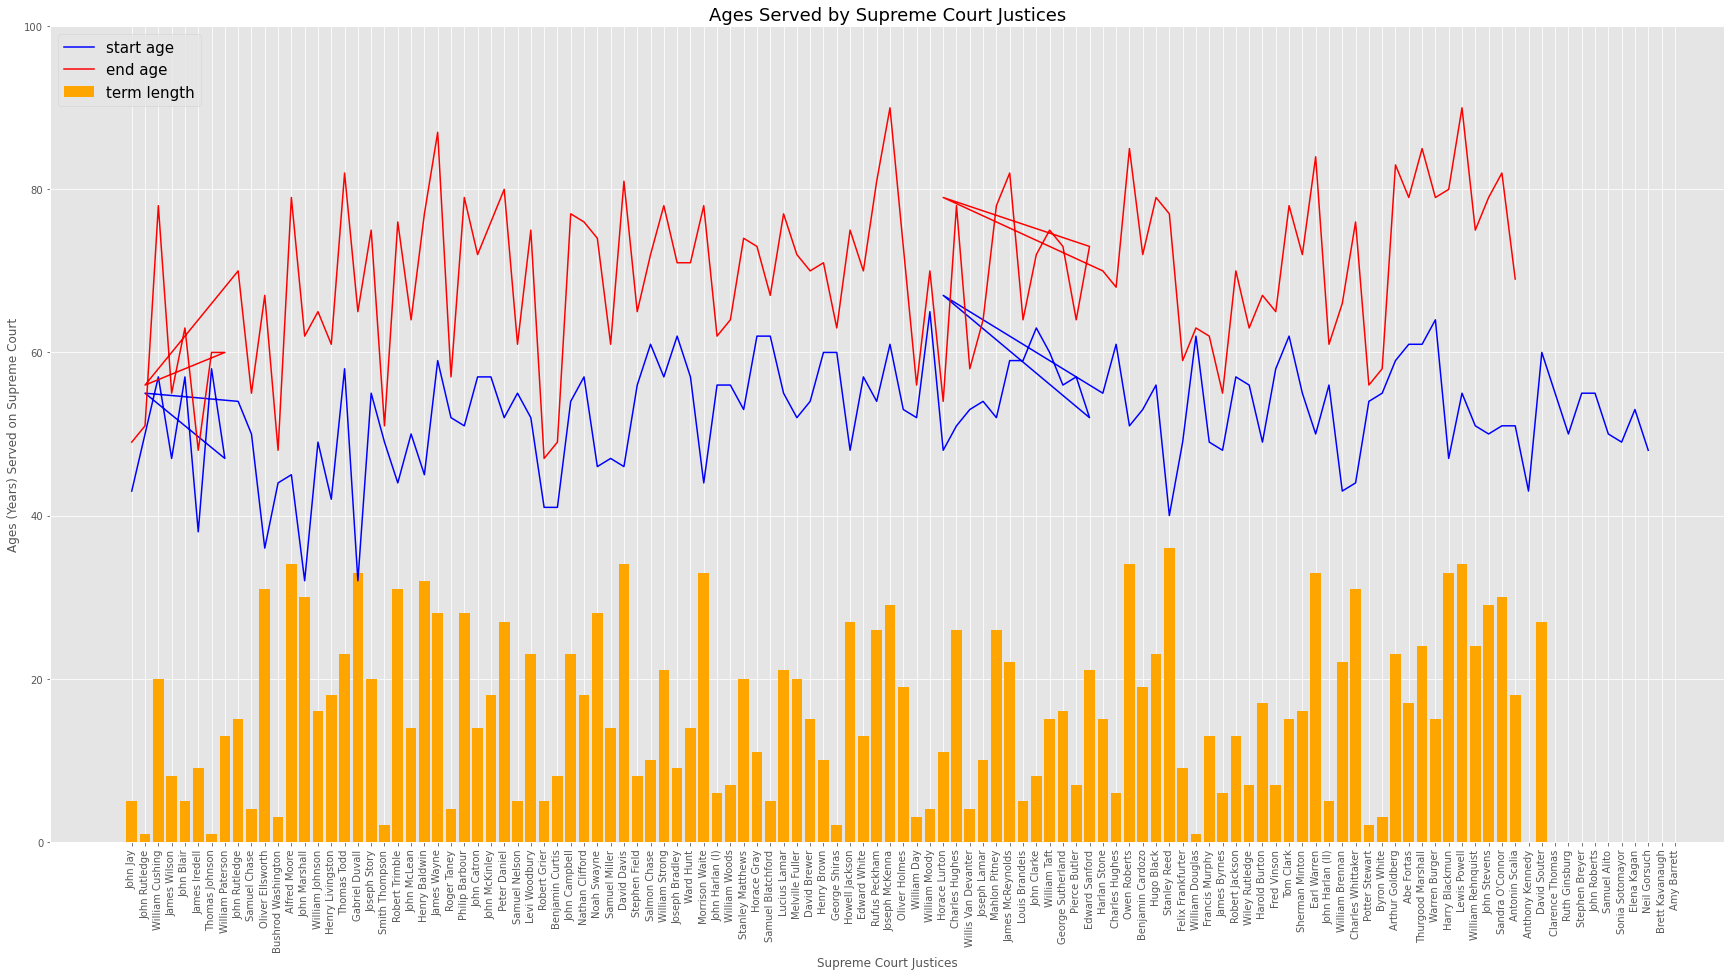

In [18]:
fig, ax = plt.subplots(figsize=(30,15))

ax.plot(scotus.index, scotus["start_age"], color='blue', label='start age')
ax.plot(scotus.index, scotus['end_age'], color='red', label='end age')
ax.bar(scotus.index, scotus["court_tenure"], color='orange', label='term length')

# set up the x-axis to show all of the justice names
ax.set_xlabel('Supreme Court Justices')
#ax.set_xlim(0)
ax.set_xticks(range(0,len(scotus.index)))
ax.set_xticklabels(scotus.index, rotation=90)

# set up the y-axis to show years 0 through 100
ax.set_ylim(0,100)
ax.set_ylabel('Ages (Years) Served on Supreme Court')
ax.set_yticks([0,20,40,60,80,100])

# set title and legend and show the graphs
ax.set_title('Ages Served by Supreme Court Justices', size=18)
ax.legend(fontsize=15)
plt.show()


<AxesSubplot:xlabel='start_age', ylabel='court_tenure'>

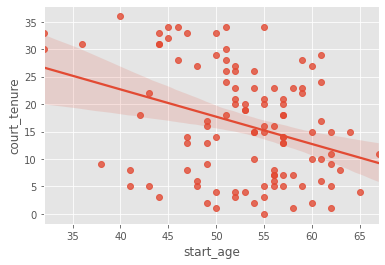

In [19]:
sns.regplot(x='start_age',y='court_tenure',data=scotus, fit_reg=True)

<AxesSubplot:xlabel='end_age', ylabel='court_tenure'>

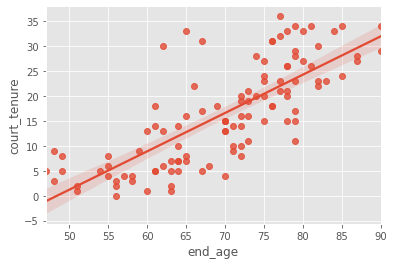

In [20]:
sns.regplot(x='end_age',y='court_tenure',data=scotus, fit_reg=True)

# Conclusion

Over time, we see the Supreme Court Justices serving to an older age though from the "Ages Served by Supreme Court Justices" graph and regression plots above, we notice the start age starts to increase.

From the graphs above, we can conclude that the Supreme Court Justices' court tenure has a slight increase over time.